#### Alumno: Christian Abel López Varela
#### Materia: Percepción Computacional
#### Profesor: Dra. PATRICIA RAYON VILLELA

# Laboratorio: Eliminación de anomalías y ajuste de intensidad en imágenes.

## Objetivo

> El objetivo de esta actividad es familiarizarnos con las técnicas de eliminación de anomalías y de ajuste de intensidad. Al finalizar <br> la actividad serás capaz de seleccionar la mejor técnica para eliminar anomalías, así como aplicar diversas técnicas de ajuste de intensidad.

### Descripción de la actividad

#### 1. Eliminación de anomalías:
    - Selecciona dos imágenes.
    - Agrega ruido de sal y pimienta o alguna otra anomalía.
    - Selecciona dos técnicas para eliminar el ruido o la anomalía presentada (una con desarrollo propio y otra de OpenCV).
    - Realiza pruebas con las dos técnicas.
    - Identifica una medida de desempeño cuantitativa que te permita seleccionar la mejor imagen con los mejores parámetros (utiliza la imagen original).
    - Compara y concluye.

#### 2.	Ajuste de intensidad:
    - Selecciona dos imágenes que requieran una mejora de contraste.
    - Aplica dos técnicas que permitan mejorar el contraste (una con desarrollo propio y otra de OpenCV).
    - Aplica las dos técnicas a las dos imágenes.
    - Describe como seleccionaste la mejor técnica para el ajuste de intensidad.
    - Describe características de las técnicas seleccionadas.
    - Compara y concluye.


Implementa tu solución en notebook de Python que describirá Los pasos implementados. El notebook deberá incluir los puntos mencionados anteriormente.

Los algoritmos propuestos no deben ser ad hoc, sino que debe poder extrapolarse a otras imágenes. Para la solución aportada incluye un desarrollo propio y otro de la biblioteca <br>
de OpenCV, tanto para la eliminación de anomalías como para la mejora de intensidad. La solución aportada no debe ser básica: repetición de una solución bien conocida o existente <br>
en una librería. Se pueden utilizar funcionalidades proporcionadas por las librerías, pero la implementación de la operación principal debe ser propia. No se permite copiar código <br>
de Internet. En caso de que se reutilicen ideas deberá referenciarse la fuente.

##### Extensión máxima

La extensión máxima permitida en esta actividad es de seis páginas.

##### Formato de entrega

Comenta todos los resultados obtenidos y exporta el notebook a un fichero con extensión .pdf, comenta todos los puntos que se solicitan. Es importante asegurarse de que la visualización <br>
es correcta y todos los apartados del ejercicio son legibles (se puede obtener directamente desde los notebooks «imprimiendo» en PDF).

#### Rúbrica

|Eliminación de anomalías y ajuste de intensidad en imágenes|Descripción|Puntuación máxima(puntos)|Peso%|
|-----|------|-----|------|
|Criterio 1|Utiliza dos técnicas (una de desarrollo propio y otra de OpenCV) para la eliminación de anomalías.|2|20%|
|Criterio 2|Utiliza dos técnicas (una de desarrollo propio y otra de OpenCV) para el ajuste de intensidad.|2|20%|
|Criterio 3|Identifica una medida de desempeño en el caso de anomalías, compara y concluye.|1|10%|
|Criterio 4|Describe la manera de seleccionar la mejor técnica para la mejora de intensidad, describe, compara y concluye.|1|10%|
|Criterio 5|El notebook ejecuta correctamente y muestra los resultados de los principales pasos.|2|20%|
|Criterio 6|Incluye todos los puntos anteriores en el reporte.|2|20%|
|Criterio 7|Existe plagio no debidamente referenciado o el trabajo es similar y con los mismos puntos de fallo que el de otro compañero.|-10|-100%|
|||10|100 %|


---

### Importamos las librerias necesarias en las actividades

In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import pandas as pd

### Definimos dos funciones para mostrar las imágenes usando matplotlib.

Esta función muestra una imagen abierta por OpenCV.
    
    imagen: Imagen abierta en OpenCV

    titulo: Título opcional de la imagen

    cmap: default=gray. Pasa None para mostrar imagen a color.
    
```mostrar_imagen(imagen, 'Un título', [None])```

Esta función muestra una serie de imágenes abiertas por OpenCV.
    
    imagenes: Array de imágenes abiertas en OpenCV

    titulos: Títulos opcionales de las imágenes

    cmaps: Opcionales. Pasa None en el índice de cada imagen para mostrar imagen a color. Si cmaps es None, todas las imágenes serán grises.
    
```mostrar_imagenes(imagenes, None, None)```

In [96]:
def mostrar_imagen(imagen, titulo = 'Imagen', cmap = 'gray'):
    mostrar_imagenes(imagenes=[imagen], titulos = [titulo], cmaps = [cmap])

def mostrar_imagenes(imagenes, titulos = None, cmaps = None):
    n = len(imagenes)
    if titulos is None:
        titulos = ['Imagen'] * n;

    if cmaps is None:
        cmaps = ['gray'] * n

    plt.figure(figsize=(5 * n, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(imagenes[i], cmap = cmaps[i])
        plt.title(titulos[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

## Eliminación de Anomalías

***Una anomalía es un valor, observación o patrón que no sigue la tendencia general de los datos y que puede indicar un error, evento inusual o comportamiento sospechoso.***

Ejemplos comunes:
- Una transacción bancaria inusualmente alta → posible fraude.
- Un sensor que marca -100 °C en una fábrica → posible error o falla.
- Un pico de tráfico web a medianoche → comportamiento atípico o ataque.

Detectar anomalías ayuda a:
- Identificar problemas o fraudes.
- Corregir errores en los datos.
- Tomar decisiones informadas en tiempo real.

### Abrimos imágenes originales en escala de grises y las guardamos en unas variables que buscaremos que sean inmutables.

In [97]:
original_cars_11 = cv.imread('../imagenes/cars/Cars11.png', cv.IMREAD_GRAYSCALE)
original_cars_3 = cv.imread('../imagenes/cars/Cars3.png', cv.IMREAD_GRAYSCALE)

if original_cars_11 is None:
    print('No se pudo abrir la imagen de Cars11')

if original_cars_3 is None:
    print('No se pudo abrir la imagen de Cars3')

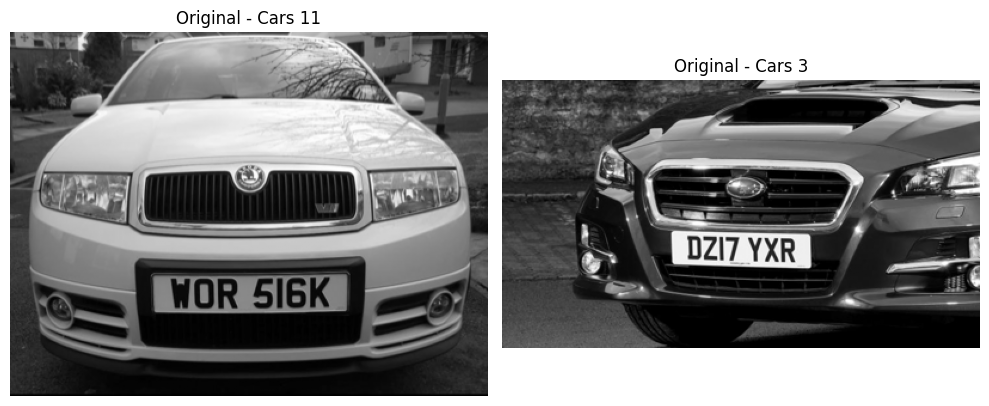

In [98]:
mostrar_imagenes(
    imagenes=[original_cars_11, original_cars_3],
    titulos=['Original - Cars 11', 'Original - Cars 3']
)

### Definimos una función para agregar ruido sal y pimienta

Esta función agrega ruido sal y pimienta a la imagen.

    imagen: Objeto abierto con cv2.imread  
    porcentaje: El porcentaje de ruido que se le agregará a la imagen. Default 0.1 = 10%.  
                El 50% del porcentaje será para sal y el otro 50% será para pimienta.  
    return: Imagen con ruido.

```python
agregar_ruido_sal_y_pimienta(imagen, porcentaje=0.1)

In [99]:
def agregar_ruido_sal_y_pimienta(imagen, porcentaje = 0.1):
    imagen_con_ruido = imagen.copy()
    total_ruido = int(porcentaje * imagen_con_ruido.size / 2)

    # Añadimos sal
    pixeles_con_sal = [np.random.randint(0, i - 1, total_ruido) for i in imagen.shape]
    imagen_con_ruido[pixeles_con_sal[0], pixeles_con_sal[1]] = 255

    # Añadimos sal
    pixeles_con_pimienta = [np.random.randint(0, i - 1, total_ruido) for i in imagen.shape]
    imagen_con_ruido[pixeles_con_pimienta[0], pixeles_con_pimienta[1]] = 0

    return imagen_con_ruido

### Generamos una imagen con ruido sal y pimienta al 5 % usando las imágenes originales.

In [100]:
cars_11_con_ruido = agregar_ruido_sal_y_pimienta(original_cars_11, 0.05)
cars_3_con_ruido = agregar_ruido_sal_y_pimienta(original_cars_3, 0.05)

### Mostramos las imágenes originales e imágenes con ruido sal y pimienta

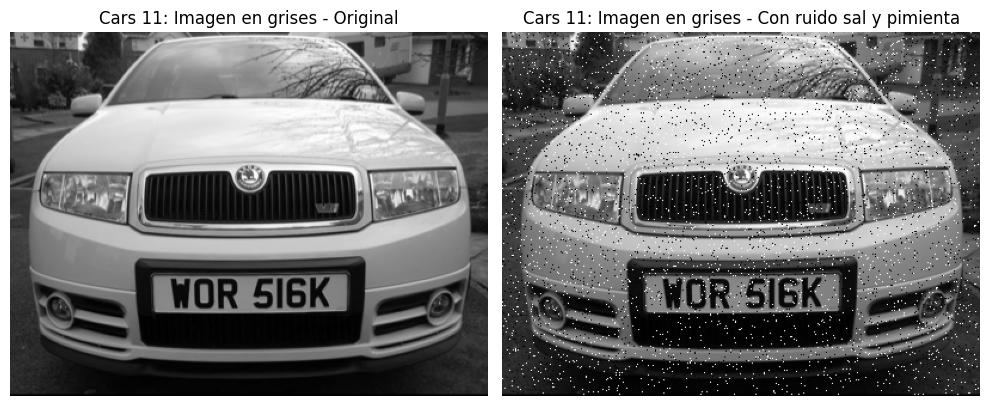

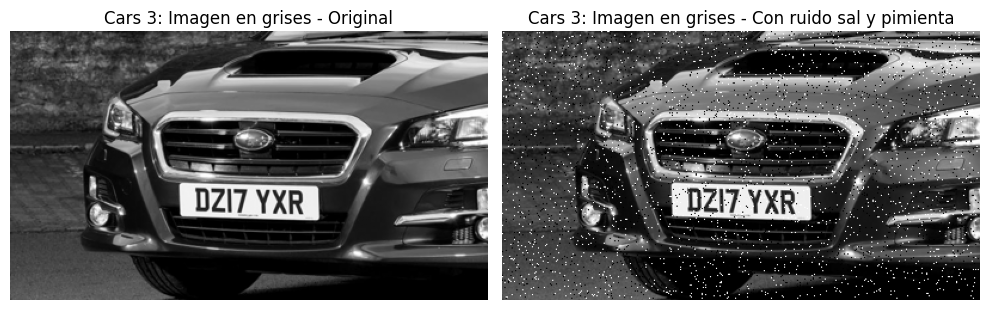

In [101]:
mostrar_imagenes(
    imagenes = [original_cars_11, cars_11_con_ruido],
    titulos = ['Cars 11: Imagen en grises - Original', 'Cars 11: Imagen en grises - Con ruido sal y pimienta']
)

mostrar_imagenes(
    imagenes = [original_cars_3, cars_3_con_ruido],
    titulos = ['Cars 3: Imagen en grises - Original', 'Cars 3: Imagen en grises - Con ruido sal y pimienta']
)

### Usando OpenCV quitamos el ruido sal y pimienta - Método de Mediana

Este método, existente en la librería OpenCV, ayuda a suavizar la imagen sin perder los detalles como los bordes.  
El filtro trabaja reemplazando cada píxel con la mediana de sus vecinos.  
Funciona eficientemente con el ruido de sal y pimienta.

    inputArray: Imagen abierta por OpenCV  
    ksize: Debe ser un entero impar. Entre más grande, más suaviza la imagen, pero se pueden perder más detalles.


In [102]:
cars_11_filtrada_opencv = cv.medianBlur(cars_11_con_ruido, ksize = 3)
cars_3_filtrada_opencv = cv.medianBlur(cars_3_con_ruido, ksize = 3)

### Usando una implementación propia: Filtro Kuwahara

Este filtro funciona seleccionando una ventana cuadrada alrededor de cada uno de los píxeles.  
La ventana la dividiremos en 4 cuadrantes superpuestos, dado que cada región contendrá al píxel central.  
Para cada región calcularemos la media y la varianza.  
Al final, elegiremos el cuadrante con la menor varianza, la que esté más uniforme.  
El píxel central se reemplaza por la media del cuadrante seleccionado.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Kuwahara.jpg/200px-Kuwahara.jpg)

```python
# Esta función nos quitará el ruido de sal y pimienta usando el filtro Kuwahara.

# imagen: Una imagen abierta con OpenCV.
# tamanio_ventana: El tamaño total de la ventana. Debe ser un número impar.
#                  Dado que tamanio_ventana es igual a 2a + 1, donde "a" es un número positivo mayor que 0.
#                  Esto asegura que siempre sea un número impar. Valor default = 5.
#     Ejemplo: a = 1 entonces 2(1) + 1 = 3
#     Ejemplo: a = 2 entonces 2(2) + 1 = 5
# return: Una nueva imagen filtrada.

kuwahara_filter(imagen, tamanio_ventana=5)
```

[https://en.wikipedia.org/wiki/Kuwahara_filter](https://en.wikipedia.org/wiki/Kuwahara_filter)

In [103]:
def kuwahara_filter(imagen, tamanio_ventana = 5):
    # Obtenemos un tamaño para cada uno de los cuadrantes.
    tamanio_cuadrante = tamanio_ventana // 2

    # Los bordes se generan con el objetivo de que, para cada uno de los píxeles de nuestra imagen con ruido, 
    # se pueda seleccionar una ventana para obtener los cuadrantes.
    # Le pasamos la imagen, luego pasamos el tamaño que tendrá el borde en cada lado (top, bottom, left, right),
    # y al final definimos cómo vamos a generar este borde. 
    # BORDER_REFLECT refleja los píxeles que se tienen en la imagen. 
    # Ejemplo: cba|abcdefg|gfe
    imagen_con_borde = cv.copyMakeBorder(imagen, tamanio_cuadrante, tamanio_cuadrante, tamanio_cuadrante, tamanio_cuadrante, cv.BORDER_REFLECT)

    # Generamos un arreglo bidimensional del mismo tamaño que la imagen de entrada. Se inicializa en 0.
    imagen_filtrada = np.zeros_like(imagen)

    # Obtenemos las filas y columnas de nuestra imagen con ruido.
    filas, columnas = imagen.shape

    # Recorremos fila por fila y columna por columna nuestra imagen.
    for i in range(filas):
        for j in range(columnas):
            # Obtenemos nuestra ventana usando la imagen con bordes.
            ventana = imagen_con_borde[i: i + tamanio_ventana, j: j + tamanio_ventana]

            # Dividimos nuestra ventana en los 4 cuadrantes que necesitamos.
            cuadrantes = [
                ventana[0: tamanio_cuadrante + 1, 0: tamanio_cuadrante + 1], # Cuadrante 1
                ventana[0: tamanio_cuadrante + 1, tamanio_cuadrante:],       # Cuadrante 2
                ventana[tamanio_cuadrante:, 0: tamanio_cuadrante],           # Cuadrante 3
                ventana[tamanio_cuadrante:, tamanio_cuadrante:]              # Cuadrante 4
            ]

            # Calculamos las medias y las varianzas de cada uno de los cuadrantes.
            medias_cuadrantes = [np.mean(cuadrante) for cuadrante in cuadrantes]
            varianza_cuadrantes = [np.var(cuadrante) for cuadrante in cuadrantes]

            # Buscamos el cuadrante con menor varianza.
            indice_menor_varianza = np.argmin(varianza_cuadrantes)

            # Se guarda la media del cuadrante con menor varianza en el arreglo bidimensional. La media se convierte a entero, por si tenemos valores decimales.
            imagen_filtrada[i, j] = int(medias_cuadrantes[indice_menor_varianza])

    # Al final, retornamos la imagen filtrada.
    return imagen_filtrada

In [104]:
cars_11_filtrada_manual = kuwahara_filter(cars_11_con_ruido, 5)
cars_3_filtrada_manual = kuwahara_filter(cars_3_con_ruido, 5)

### Mostramos las imagenes Originales vs filtradas

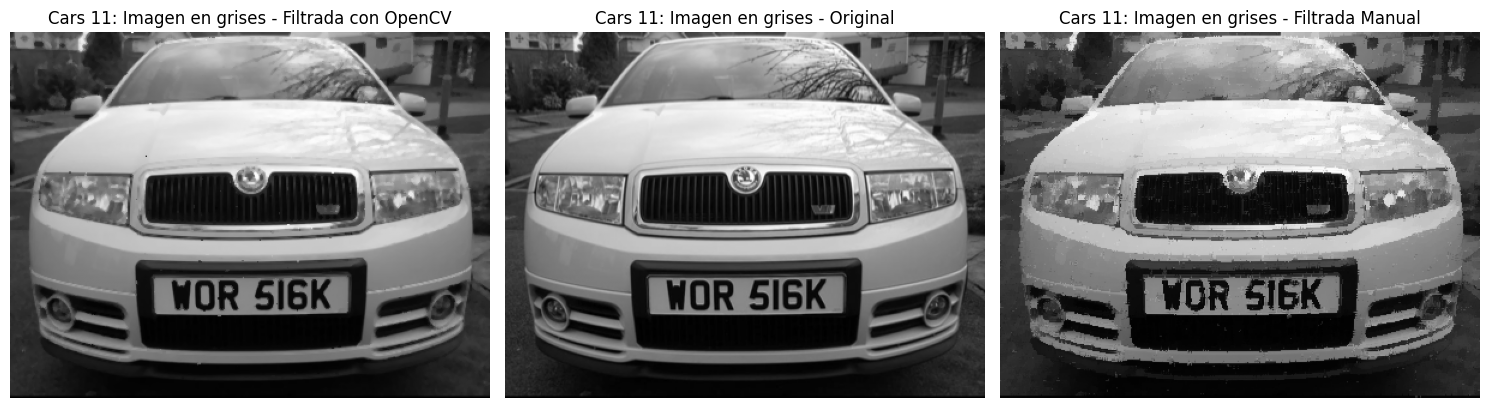

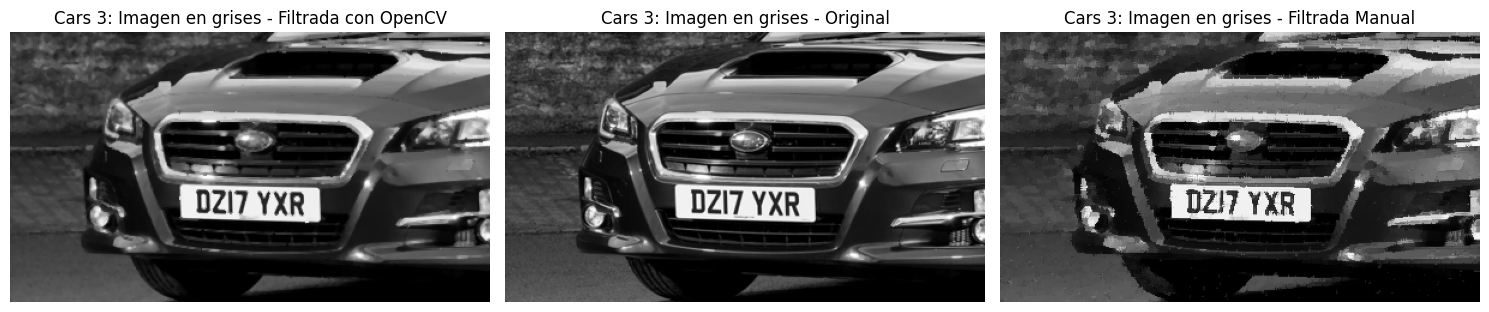

In [105]:
mostrar_imagenes(
    imagenes = [cars_11_filtrada_opencv, original_cars_11, cars_11_filtrada_manual],
    titulos = ['Cars 11: Imagen en grises - Filtrada con OpenCV', 'Cars 11: Imagen en grises - Original', 'Cars 11: Imagen en grises - Filtrada Manual']
)

mostrar_imagenes(
    imagenes = [cars_3_filtrada_opencv, original_cars_3, cars_3_filtrada_manual],
    titulos = ['Cars 3: Imagen en grises - Filtrada con OpenCV', 'Cars 3: Imagen en grises - Original', 'Cars 3: Imagen en grises - Filtrada Manual']
)

### Calculamos las diferencias entre las imágenes filtradas y la imagen original

Para hacer esto, usaremos tres métricas:

1. **MSE (Mean Squared Error):**  
   - Con esto vamos a calcular el promedio de los errores al cuadrado por cada píxel. Entre más bajo, es mejor (hay menos diferencia).

2. **SSIM (Índice de similitud estructural):**  
   - Con esto vamos a medir la similitud perceptual entre las dos imágenes (original y filtrada).  
     Se considerarán estructura, luminancia y contraste. La escala va del 0 al 1, donde 1 = idénticas.

3. **PSNR (Peak Signal-to-Noise Ratio):**  
   - Con esto vamos a medir la calidad de la imagen restaurada comparada con la original.  
     Cuanto más alto, es mejor (existe menos diferencia entre la imagen limpia y la filtrada).  
     La escala es típicamente entre 30 y 50 dB. >40 dB se considera excelente.


### Definimos unas funciones que nos ayudarán a calcular las diferentes métricas

```python
# Calcula el MSE.
calcular_mse(imagen_original, imagen_filtrada)

# Calcula el SSIM.
calcular_ssim(imagen_original, imagen_filtrada, multichannel=False)

# Calcula el PSNR.
calcular_psnr(imagen_original, imagen_filtrada)

# Parámetros:
#    imagen_original: Imagen original en escala de grises abierta por OpenCV.
#    imagen_filtrada: Imagen filtrada por alguno de los métodos usados anteriormente.

# Solo en SSIM:
#     channel_axis: -1 para imágenes a color. None (default) para escala de grises.

# return: El valor de cada función.
```

In [106]:
def calcular_mse(imagen_original, imagen_filtrada):
    return np.mean((imagen_original.astype(np.float64) - imagen_filtrada.astype(np.float64)) ** 2)

def calcular_ssim(imagen_original, imagen_filtrada, channel_axis = None):
    valor_ssim, _ = structural_similarity(imagen_original, imagen_filtrada, full = True, channel_axis = channel_axis)
    return valor_ssim

def calcular_psnr(imagen_original, imagen_filtrada):
    return cv.PSNR(imagen_original, imagen_filtrada)

### Calculamos las metricas para cada una de las imagenes.

In [107]:
metricas_cars_11 = {
    "Filtrada_OpenCV_vs_Original": {
        "MSE": calcular_mse(original_cars_11, cars_11_filtrada_opencv),
        "SSIM": calcular_ssim(original_cars_11, cars_11_filtrada_opencv),
        "PSNR": calcular_psnr(original_cars_11, cars_11_filtrada_opencv)
    },
    "Filtrada_Manual_vs_Original": {
        "MSE": calcular_mse(original_cars_11, cars_11_filtrada_manual),
        "SSIM": calcular_ssim(original_cars_11, cars_11_filtrada_manual),
        "PSNR": calcular_psnr(original_cars_11, cars_11_filtrada_manual)
    }
}
print(metricas_cars_11)

metricas_cars_3 = {
    "Filtrada_OpenCV_vs_Original": {
        "MSE": calcular_mse(original_cars_3, cars_3_filtrada_opencv),
        "SSIM": calcular_ssim(original_cars_3, cars_3_filtrada_opencv),
        "PSNR": calcular_psnr(original_cars_3, cars_3_filtrada_opencv)
    },
    "Filtrada_Manual_vs_Original": {
        "MSE": calcular_mse(original_cars_3, cars_3_filtrada_manual),
        "SSIM": calcular_ssim(original_cars_3, cars_3_filtrada_manual),
        "PSNR": calcular_psnr(original_cars_3, cars_3_filtrada_manual)
    }
}
print(metricas_cars_3)

{'Filtrada_OpenCV_vs_Original': {'MSE': np.float64(51.34289344262295), 'SSIM': np.float64(0.9452710758664088), 'PSNR': 31.026000210600277}, 'Filtrada_Manual_vs_Original': {'MSE': np.float64(238.33227868852458), 'SSIM': np.float64(0.7945553011535469), 'PSNR': 24.358974955799226}}
{'Filtrada_OpenCV_vs_Original': {'MSE': np.float64(108.1488), 'SSIM': np.float64(0.9167474828510005), 'PSNR': 27.79058655920998}, 'Filtrada_Manual_vs_Original': {'MSE': np.float64(354.3625333333333), 'SSIM': np.float64(0.7835029264133516), 'PSNR': 22.636325630782718}}


In [108]:
df_metricas_cars_11 = pd.DataFrame(metricas_cars_11).T
df_metricas_cars_3 = pd.DataFrame(metricas_cars_3).T

### Conclusión

El filtro de Kuwahara se enfoca más en conservar los bordes. Se utiliza más cuando la imagen tiene poco ruido y se quieren preservar detalles, <br>
pero no funciona bien en imágenes donde el ruido está focalizado o es muy fuerte. En los casos de sal y pimienta, no filtra lo suficiente; <br>
por lo tanto, en las métricas, comparado contra el filtro de mediana, salió perdiendo.

En el caso del filtro de mediana, es un filtro especialmente diseñado para el ruido de sal y pimienta, ya que podemos ver en las métricas que este <br>
filtro deja menos error residual, no se aleja tanto del original y su PSNR es excelente.

Por lo tanto, para ruidos de sal y pimienta, la mejor opción es el filtro de mediana. <br>
Kuwahara sería útil para casos donde se quieren preservar los bordes y suavizar detalles sin ruido fuerte.

In [109]:
df_metricas_cars_11

MSE      SSIM       PSNR
Filtrada_OpenCV_vs_Original   51.342893  0.945271  31.026000
Filtrada_Manual_vs_Original  238.332279  0.794555  24.358975

In [110]:
df_metricas_cars_3

MSE      SSIM       PSNR
Filtrada_OpenCV_vs_Original  108.148800  0.916747  27.790587
Filtrada_Manual_vs_Original  354.362533  0.783503  22.636326

---
---
---

## Ajuste de Intensidad

### Definimos dos funciones para mostrar las imágenes a color usando matplotlib.

Esta función muestra una imagen a color abierta por OpenCV. Convierte los colores de BGR a RGB y reutiliza la función "mostrar_imagen".

    imagen: Imagen abierta en OpenCV

    titulo: Título opcional de la imagen

```python
mostrar_imagen_color(imagen, 'Un título')
```

Esta función muestra una serie de imágenes a color abiertas por OpenCV. Convierte los colores de BGR a RGB y reutiliza la función "mostrar_imagenes".

    imagenes: Imágenes abiertas en OpenCV

    titulos: Títulos opcionales de cada imagen
    
```python
mostrar_imagenes_color(imagenes, None)
```

In [111]:
def mostrar_imagen_color(imagen, titulo = 'Imagen'):
    mostrar_imagen(cv.cvtColor(imagen, cv.COLOR_BGR2RGB), titulo, None)

def mostrar_imagenes_color(imagenes, titulos = None):
    mostrar_imagenes(
        imagenes = [cv.cvtColor(imagen, cv.COLOR_BGR2RGB) for imagen in imagenes],
        titulos = titulos,
        cmaps = [None] * len(imagenes)
    )

### Abrimos imagenes originales y las guardamos en unas variables que buscaremos que sean inmutables.

In [112]:
original_coche_01 = cv.imread('../imagenes/cars/coche01.jpeg')
original_coche_15 = cv.imread('../imagenes/cars/coche15.jpeg')

if original_coche_01 is None:
    print('No se pudo abrir la imagen de coche01')

if original_coche_15 is None:
    print('No se pudo abrir la imagen de coche15')

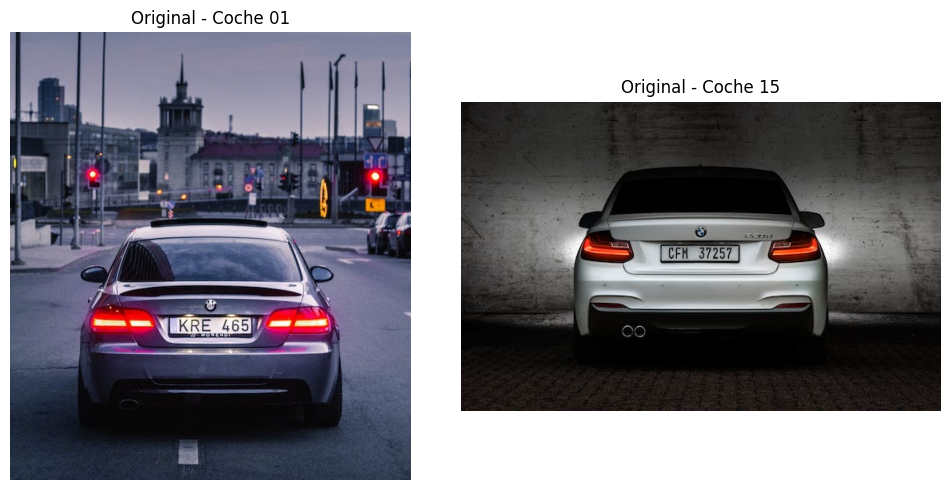

In [113]:
mostrar_imagenes_color(
    imagenes = [original_coche_01, original_coche_15],
    titulos = ['Original - Coche 01', 'Original - Coche 15']
)

## Normalizando el contraste de una imagen usando OpenCV

### Definimos una función para mejorar el contraste de la imagen ecualizando el canal V en HSV con la función de OpenCV `equalizeHist`

Primero tenemos que convertir la imagen de BGR a HSV.


    Esta función espera una imagen que necesita una mejora en el contraste.
    
    imagen: Imagen abierta en OpenCV  
    
    return: Imagen mejorada
```python
mejorar_contraste_opencv_canal_V(imagen)
```

In [114]:
def mejorar_contraste_opencv_canal_V(imagen):
    # Convertimos la imagen a color HSV
    imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)

    # Ecualizamos el canal V, que es el brillo.
    imagen_hsv[:, :, 2] = cv.equalizeHist(imagen_hsv[:, :, 2])

    # retornamos la imagen de vuelta en color BGR
    return cv.cvtColor(imagen_hsv, cv.COLOR_HSV2BGR)

### Mejoramos el contraste de nuestras imagenes y las mostramos

In [115]:
mejorada_opencv_coche_01 = mejorar_contraste_opencv_canal_V(original_coche_01)
mejorada_opencv_coche_15 = mejorar_contraste_opencv_canal_V(original_coche_15)

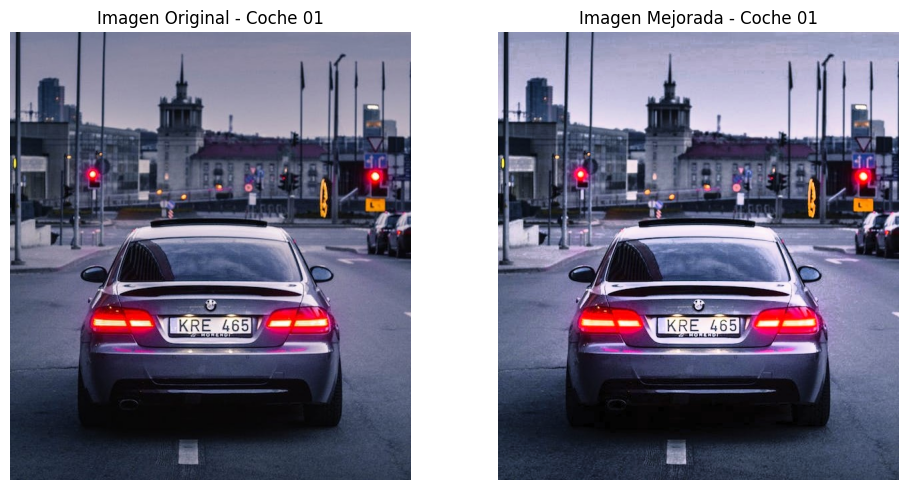

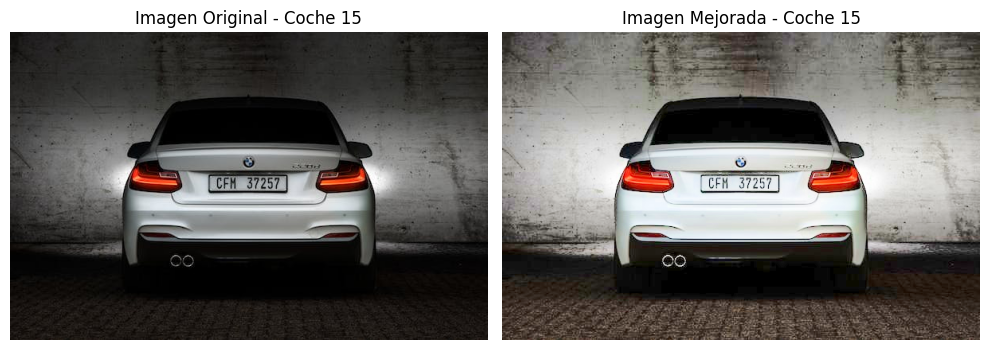

In [116]:
mostrar_imagenes_color(
    imagenes = [original_coche_01, mejorada_opencv_coche_01],
    titulos = ['Imagen Original - Coche 01', 'Imagen Mejorada - Coche 01']
)

mostrar_imagenes_color(
    imagenes = [original_coche_15, mejorada_opencv_coche_15],
    titulos = ['Imagen Original - Coche 15', 'Imagen Mejorada - Coche 15']
)

## Normalizando el contraste de una imagen de forma manual usando "Transformación Gamma"

### ¿Qué es la Transformación Gamma?

La **transformación gamma** es una operación **no lineal** que se aplica a la intensidad de los píxeles para **ajustar el brillo y el contraste** de una imagen de forma más perceptual. Es útil para corregir imágenes **muy oscuras o muy claras**.

#### Fórmula:

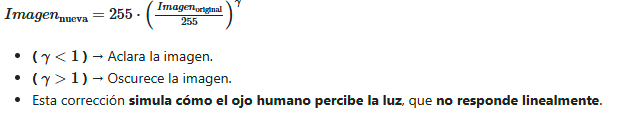

#### Aplicaciones:
- Mejora imágenes con **poca visibilidad** en zonas oscuras.
- Corrige imágenes **sobreexpuestas**.
- Se usa comúnmente en **procesamiento digital, gráficos por computadora y fotografía**.

#### Nota:
Aplicar gamma a imágenes en color puede afectar los colores. Se recomienda trabajar sobre el **canal de luminancia** (V en HSV o Y en YCrCb) para **preservar la fidelidad del color**.

#### Creamos dos funciones para aplicar esta transformación. Una para modificar todos los colores y otra solo para modificar el canal de luminancia.

Esta función aplica la transformación gamma en todos los canales de color.

    imagen: Una imagen abierta con OpenCV

    gamma: Valor gamma que se aplicará a la imagen. < 1 aclara imagen. > 1 oscurece la imagen.

    return: Imagen transformada.

```python
transformacion_gamma_colores(imagen, gamma)
```

---

Esta función aplica la transformación gamma solo al canal de luminancia.

    imagen: Una imagen abierta con OpenCV
    
    gamma: Valor gamma que se aplicará a la imagen. < 1 aclara imagen. > 1 oscurece la imagen.
    
    return: Imagen transformada.

```python
transformacion_gamma_luminancia(imagen, gamma)
```

In [117]:
def transformacion_gamma_colores(imagen, gamma = 0.5):
    imagen_escalada = imagen.astype(np.float32) / 255.0
    imagen_gamma = np.power(imagen_escalada, gamma)
    imagen_gamma = (imagen_gamma * 255.0).astype(np.uint8)
    return imagen_gamma

def transformacion_gamma_luminancia(imagen, gamma = 0.5):
    imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV).astype(np.float32)
    imagen_hsv[:, :, 2] = imagen_hsv[:, :, 2] / 255.0

    imagen_hsv[:, :, 2] = np.power(imagen_hsv[:, :, 2], gamma)

    imagen_hsv[:, :, 2] = imagen_hsv[:, :, 2] * 255.0
    imagen_hsv = imagen_hsv.astype(np.uint8)

    return cv.cvtColor(imagen_hsv, cv.COLOR_HSV2BGR)

#### Aplicamos las funciones a nuestras imágenes.

In [118]:
mejorada_manual_color_coche_01 = transformacion_gamma_colores(original_coche_01)
mejorada_manual_luminancia_coche_01 = transformacion_gamma_luminancia(original_coche_01)

mejorada_manual_color_coche_15 = transformacion_gamma_colores(original_coche_15)
mejorada_manual_luminancia_coche_15 = transformacion_gamma_luminancia(original_coche_15)

#### Mostramos las imágenes ya transformadas, así como también la original para comparar.

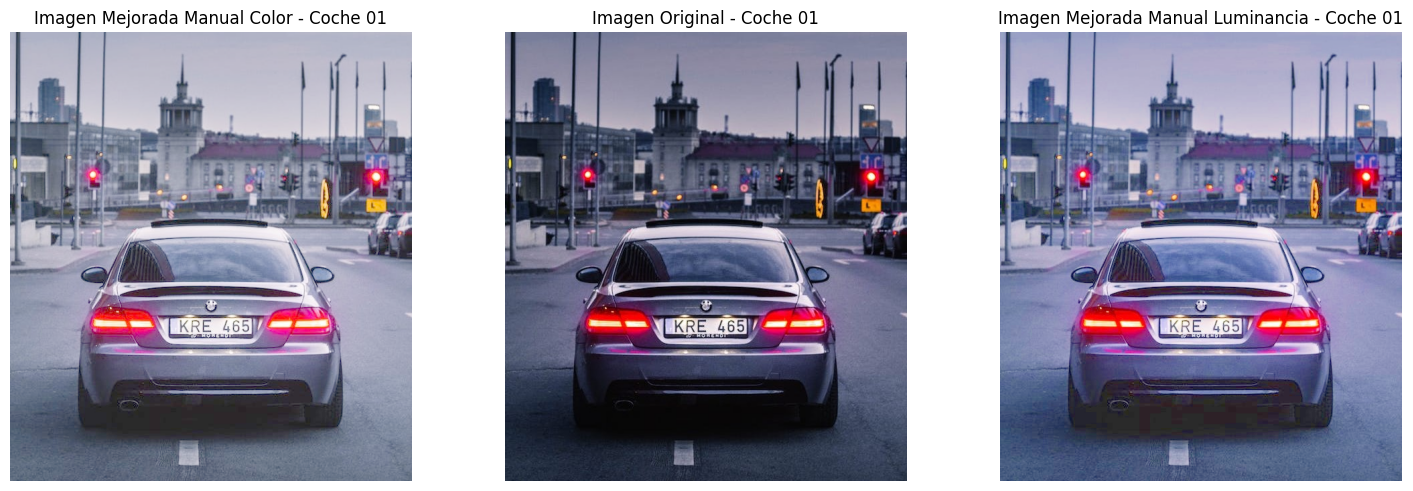

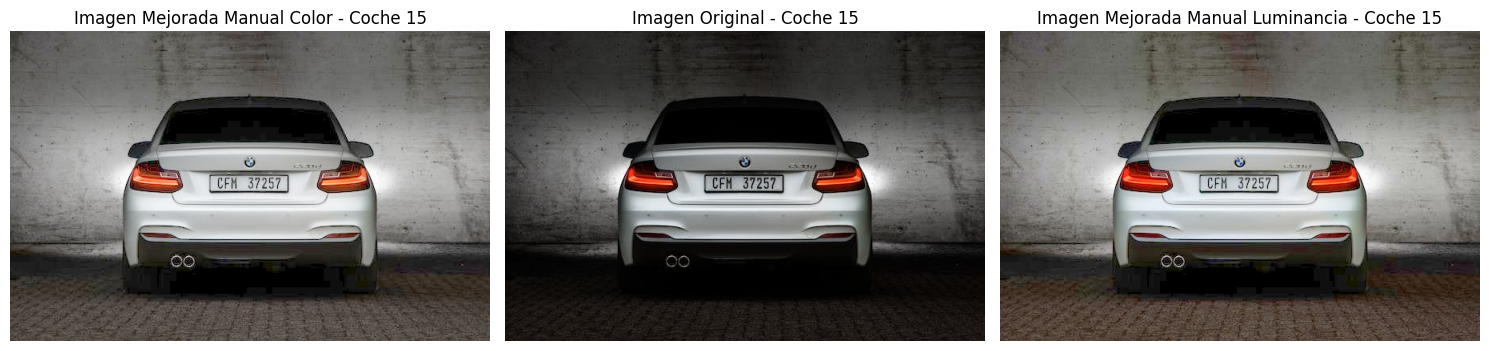

In [119]:
mostrar_imagenes_color(
    imagenes = [mejorada_manual_color_coche_01, original_coche_01, mejorada_manual_luminancia_coche_01],
    titulos = ['Imagen Mejorada Manual Color - Coche 01', 'Imagen Original - Coche 01', 'Imagen Mejorada Manual Luminancia - Coche 01']
)

mostrar_imagenes_color(
    imagenes = [mejorada_manual_color_coche_15, original_coche_15, mejorada_manual_luminancia_coche_15],
    titulos = ['Imagen Mejorada Manual Color - Coche 15', 'Imagen Original - Coche 15', 'Imagen Mejorada Manual Luminancia - Coche 15']
)

#### Comparando imágenes con mejora de contraste - OpenCV vs Original vs Manual Color

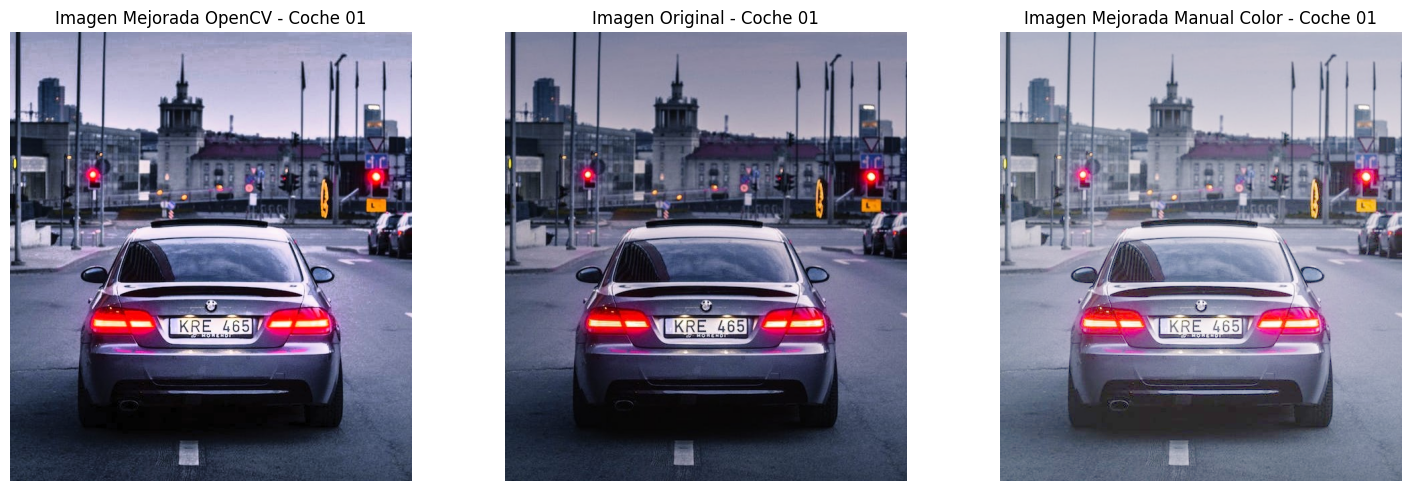

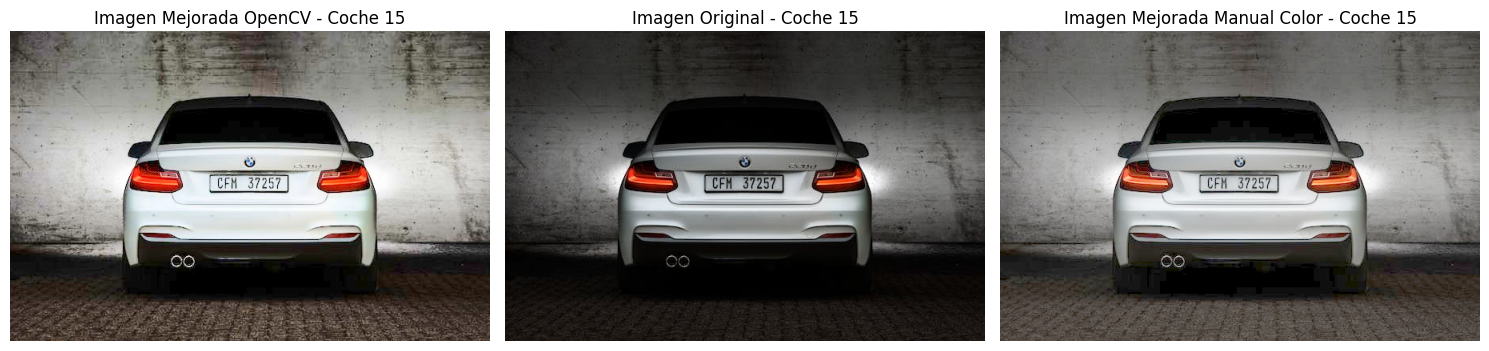

In [120]:
mostrar_imagenes_color(
    imagenes = [mejorada_opencv_coche_01, original_coche_01, mejorada_manual_color_coche_01],
    titulos = ['Imagen Mejorada OpenCV - Coche 01', 'Imagen Original - Coche 01', 'Imagen Mejorada Manual Color - Coche 01']
)

mostrar_imagenes_color(
    imagenes = [mejorada_opencv_coche_15, original_coche_15, mejorada_manual_color_coche_15],
    titulos = ['Imagen Mejorada OpenCV - Coche 15', 'Imagen Original - Coche 15', 'Imagen Mejorada Manual Color - Coche 15']
)

#### Comparando imágenes con mejora de contraste - OpenCV vs Original vs Manual Canal Luminancia

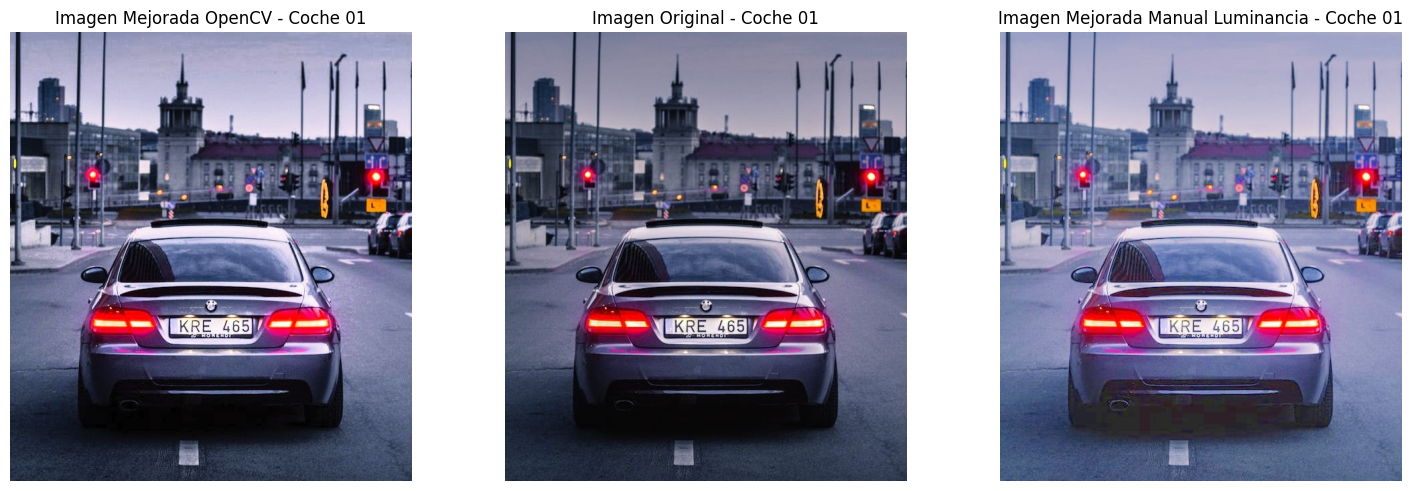

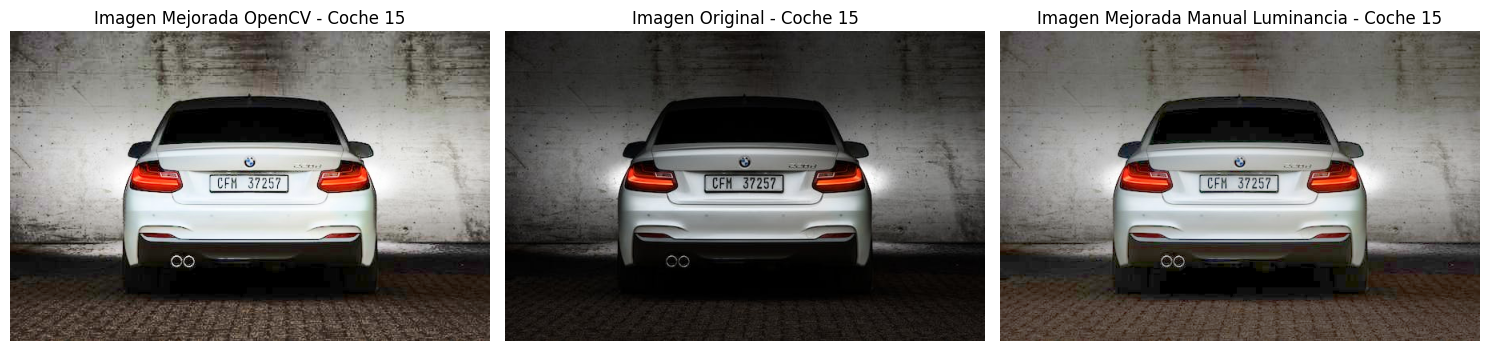

In [121]:
mostrar_imagenes_color(
    imagenes = [mejorada_opencv_coche_01, original_coche_01, mejorada_manual_luminancia_coche_01],
    titulos = ['Imagen Mejorada OpenCV - Coche 01', 'Imagen Original - Coche 01', 'Imagen Mejorada Manual Luminancia - Coche 01']
)

mostrar_imagenes_color(
    imagenes = [mejorada_opencv_coche_15, original_coche_15, mejorada_manual_luminancia_coche_15],
    titulos = ['Imagen Mejorada OpenCV - Coche 15', 'Imagen Original - Coche 15', 'Imagen Mejorada Manual Luminancia - Coche 15']
)

### Creamos una función para obtener métricas de comparación entre las diferentes técnicas vs la imagen original.

Esta función nos permite calcular las métricas para cada una de las imágenes, comparándolas contra la original.

    imagen_original: Imagen sin procesar abierta con OpenCV  
    imagenes_mejoradas: Lista de imágenes mejoradas con las diferentes técnicas.  
    nombres_tecnicas: Lista con cada uno de los nombres de las técnicas usadas para las imágenes del parámetro anterior.  
    return: DataFrame de Pandas con los resultados.

```python
evaluar_tecnicas(imagen_original, imagenes_mejoradas, nombres_tecnicas)
```

In [122]:
def evaluar_tecnicas(imagen_original, imagenes_mejoradas, nombres_tecnicas):
    resultados = []

    for i, imagen_mejorada in enumerate(imagenes_mejoradas):
        nombre = nombres_tecnicas[i]

        # calcular MSE
        mse_val = calcular_mse(imagen_original, imagen_mejorada)

        # calcular SSIM
        ssim_val = calcular_ssim(imagen_original, imagen_mejorada, -1)

        # calcular PSNR
        psnr_val = calcular_psnr(imagen_original, imagen_mejorada)

        # Calculamos varianza global.
        varianzas = [np.var(imagen_mejorada[:, :, c]) for c in range(3)]
        varianza_promedio = np.mean(varianzas)

        resultados.append({
            'Técnica': nombre,
            'MSE': round(mse_val, 4),
            'PSNR (db)': round(psnr_val, 4),
            'SSIM': round(ssim_val, 4),
            'Varianza': round(varianza_promedio, 4)
        })

    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.set_index('Técnica')

    return df_resultados

### Aplicamos la función para cada una de las técnicas en cada una de las imágenes.

In [123]:
df_metricas_tecnicas_coche_01 = evaluar_tecnicas(
    imagen_original = original_coche_01,
    imagenes_mejoradas = [mejorada_opencv_coche_01, mejorada_manual_color_coche_01, mejorada_manual_luminancia_coche_01],
    nombres_tecnicas = ['equalizeHist - OpenCV', 'Transformación Gamma BGR - Manual', 'Transformación Gamma Luminancia - Manual']
)

df_metricas_tecnicas_coche_01

MSE  PSNR (db)    SSIM  \
Técnica                                                                  
equalizeHist - OpenCV                      523.0515    20.9454  0.9564   
Transformación Gamma BGR - Manual         2772.3383    13.7023  0.7957   
Transformación Gamma Luminancia - Manual  1729.2906    15.7521  0.8376   

                                           Varianza  
Técnica                                              
equalizeHist - OpenCV                     4994.9285  
Transformación Gamma BGR - Manual         2737.6620  
Transformación Gamma Luminancia - Manual  2891.2907

In [124]:
df_metricas_tecnicas_coche_15 = evaluar_tecnicas(
    imagen_original = original_coche_15,
    imagenes_mejoradas = [mejorada_opencv_coche_15, mejorada_manual_color_coche_15, mejorada_manual_luminancia_coche_15],
    nombres_tecnicas = ['equalizeHist - OpenCV', 'Transformación Gamma BGR - Manual', 'Transformación Gamma Luminancia - Manual']
)

df_metricas_tecnicas_coche_15

MSE  PSNR (db)    SSIM  \
Técnica                                                                  
equalizeHist - OpenCV                     4507.9796    11.5910  0.5884   
Transformación Gamma BGR - Manual         2539.2578    14.0837  0.6607   
Transformación Gamma Luminancia - Manual  2312.4949    14.4900  0.6731   

                                           Varianza  
Técnica                                              
equalizeHist - OpenCV                     6008.8770  
Transformación Gamma BGR - Manual         3642.7028  
Transformación Gamma Luminancia - Manual  3722.2528

### Creamos función para comparar histogramas de imágenes.

In [125]:
def comparar_histogramas_color(imagen_original, imagenes_mejoradas, titulo_general, titulo_original = 'Original', titulos_mejoradas = None):
    imagenes_dibujar = [imagen_original] + imagenes_mejoradas
    total_imagenes = len(imagenes_dibujar)
    colores = [['b', 'Azul'], ['g', 'Verde'], ['r', 'Rojo']]

    if titulos_mejoradas is None:
        titulos_mejoradas = ['Mejorada'] * total_imagenes

    titulos = [titulo_original] + titulos_mejoradas
    
    plt.figure(figsize=(4 * len(imagenes_dibujar), 8))

    for i, imagen in enumerate(imagenes_dibujar):
        
        plt.subplot(2, total_imagenes, i + 1)
        plt.title(titulos[i])
        for j, color in enumerate(colores):
            hist = cv.calcHist([imagen], [j], None, [256], [0, 256])
            plt.plot(hist, color = color[0], label = color[1])
    
        plt.xlim([0, 256])
        plt.legend()
        plt.grid(True)

    for i, imagen in enumerate(imagenes_dibujar):
        imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
        
        plt.subplot(2, total_imagenes, 3 + i + 1)
        plt.title(titulos[i])

        imagen_hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)
        hist = cv.calcHist([imagen_hsv[:, :, 2]], [0], None, [256], [0, 256])
        plt.plot(hist, color = 'y', label = 'Brillo')
    
        plt.xlim([0, 256])
        plt.legend()
        plt.grid(True)

    plt.suptitle(titulo_general)
    plt.show()

#### Generamos los histogramas para las imágenes a color

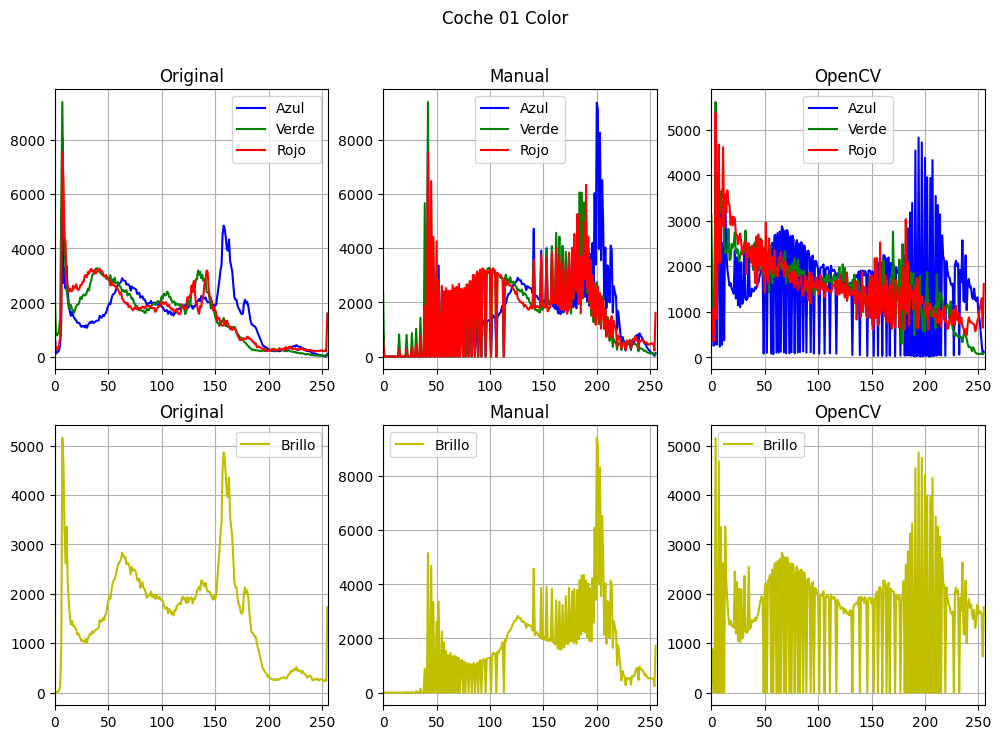

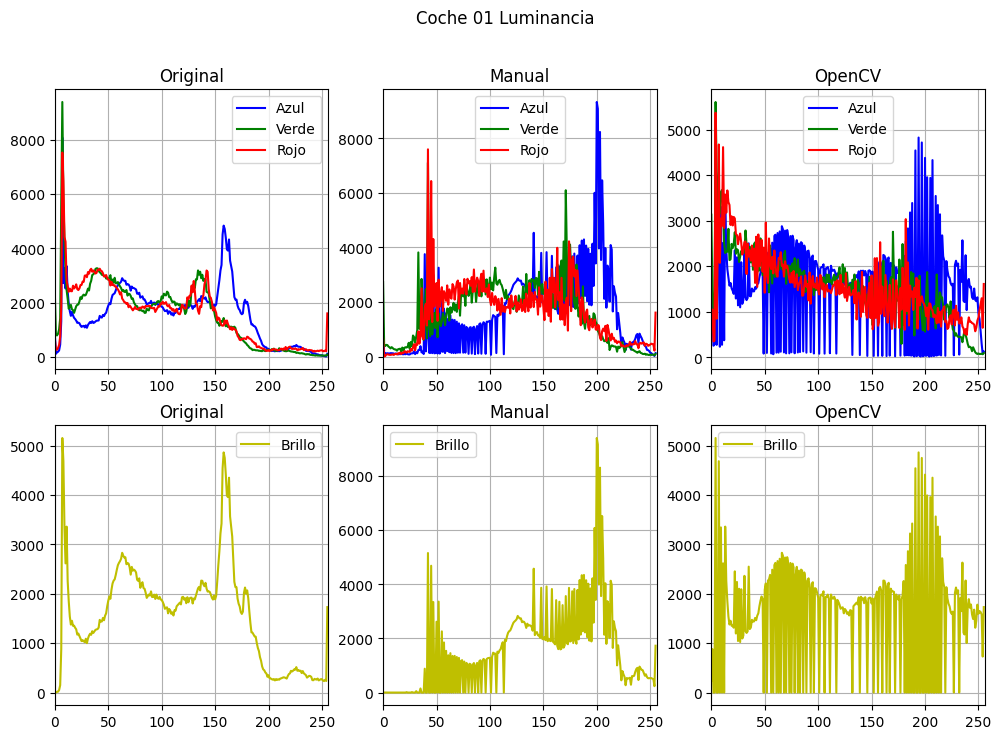

In [126]:
comparar_histogramas_color(original_coche_01, [mejorada_manual_color_coche_01, mejorada_opencv_coche_01], 'Coche 01 Color', 'Original', ['Manual', 'OpenCV'])
comparar_histogramas_color(original_coche_01, [mejorada_manual_luminancia_coche_01, mejorada_opencv_coche_01], 'Coche 01 Luminancia', 'Original', ['Manual', 'OpenCV'])

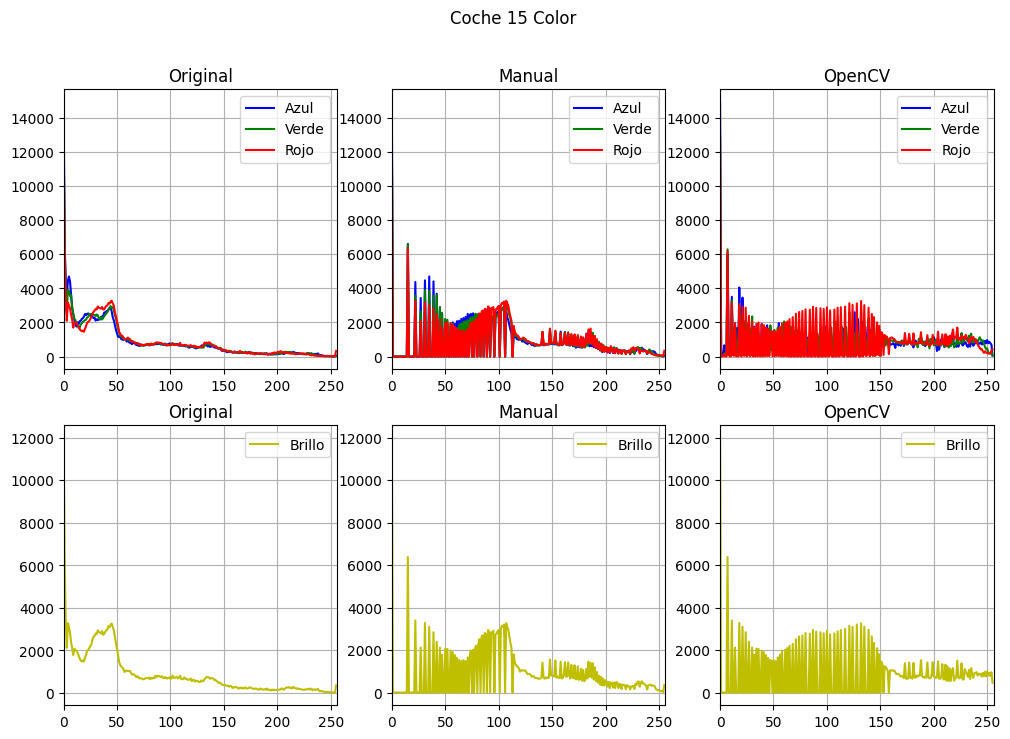

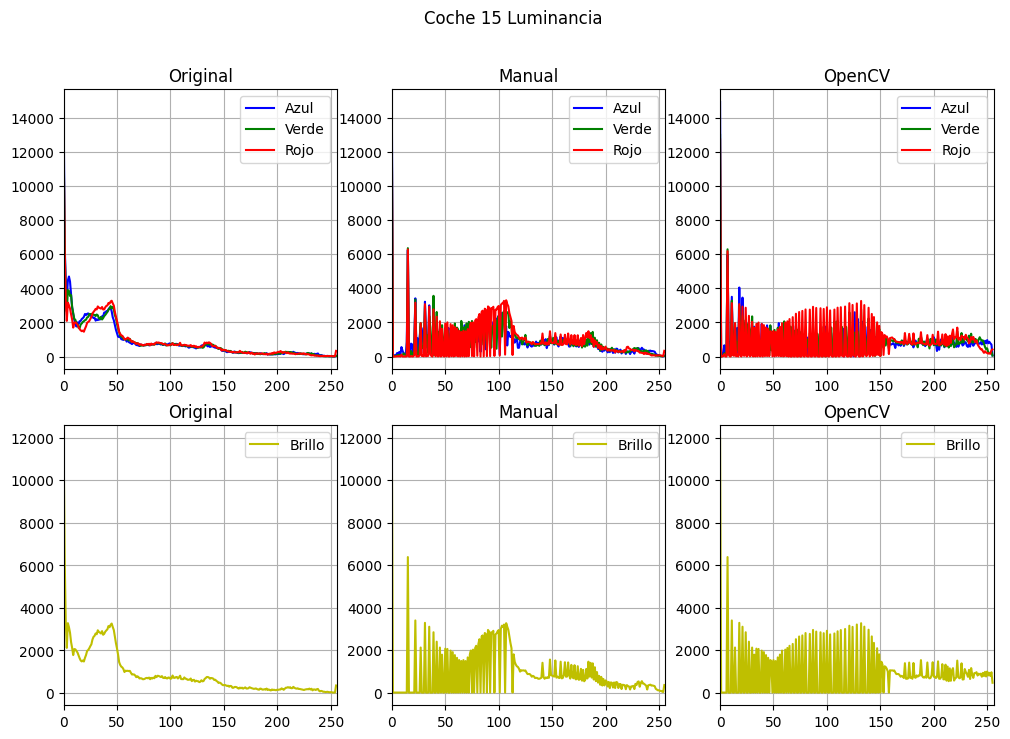

In [127]:
comparar_histogramas_color(original_coche_15, [mejorada_manual_color_coche_15, mejorada_opencv_coche_15], 'Coche 15 Color', 'Original', ['Manual', 'OpenCV'])
comparar_histogramas_color(original_coche_15, [mejorada_manual_luminancia_coche_15, mejorada_opencv_coche_15], 'Coche 15 Luminancia', 'Original', ['Manual', 'OpenCV'])

### Conclusión.

#### Visual (Subjetivo)

En lo personal, la transformación gamma enfocada en el canal de luminancia me gustó más en el coche 15.  
Siento que los colores no se perdieron tanto como fue en el caso de la transformación gamma aplicada a todos los canales de color BGR.

Pero `equalizeHist` de OpenCV en la imagen Coche 01 muestra colores más reales.  
En Coche 01, la luminancia tuvo mucho más brillo.

---

#### Interpretación de Métricas (Objetivo)

Utilizando `equalizeHist` de `OpenCV` en la imagen `Coche 01` se obtuvo:

- `MSE` más bajo, lo cual indica mejor preservación (menor error respecto a la original).
- `PSNR` más alto, lo que es bueno en este contexto, ya que la imagen cambió pero sin una degradación severa.
- `SSIM` cerca de 1.0, lo que indica que es más parecida a la original.
- `Varianza` más alta que la original, lo que indica que se obtuvo un mayor contraste respecto a la imagen original.

> El valor de la varianza lo podemos notar también al analizar los gráficos de histograma presentados arriba,  
> donde vemos que los colores y el brillo se ven mucho más dispersos en las imágenes mejoradas,  
> teniendo una mejor distribución en el histograma de OpenCV.  
> ***Con estos resultados, podemos deducir que en la imagen Coche 01, `equalizeHist` de OpenCV fue la técnica que mejor desempeño tuvo.***

---

Utilizando `Transformación Gamma en V de HSV` en la imagen `Coche 15` se obtuvo:

- `MSE` más bajo, lo cual indica mejor preservación (menor error respecto a la original).
- `PSNR` más alto, lo que es bueno en este contexto, ya que la imagen cambió pero sin una degradación severa.
- `SSIM` mayor, lo que indica que es más parecida a la original.

Utilizando `equalizeHist` de `OpenCV` en la imagen `Coche 15` se obtuvo:

- `Varianza`: tuvo un muy buen contraste, pero al tener un alto MSE y baja SSIM, se alejó mucho de la original.  
  Esto indica que podría haber sobrecontraste o pérdida de detalles.

> En el histograma de la imagen Coche 15, vemos que no hay mucha diferencia entre la transformación gamma en el canal de color  
> con respecto a la transformación gamma en el canal de luminancia.  
> Podemos observar que OpenCV tuvo una mayor dispersión en los colores y en el brillo, lo que se refleja a simple vista comparando las imágenes.  
> ***Con estos resultados, podemos ver que la mejor técnica fue la Transformación Gamma en el canal de luminancia de HSV,  
> ya que mejoró el contraste sin sacrificar calidad ni sobresaturar con brillo la imagen.***

---

***Al final, lo que podemos tener claro es que no existe una técnica universal: todo depende de la imagen que queremos mejorar.  
En mi opinión, para futuras referencias, al querer mejorar una imagen, haré funciones que me ayuden a aplicar varias técnicas de mejora,  
obtener métricas y aplicar la técnica que dé mejores resultados.***
